# Keras

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.2.0-rc4


## 1. 分类问题和回归问题

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


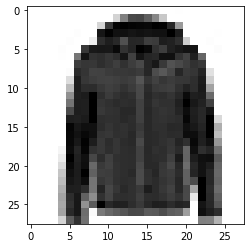

In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()
show_single_image(x_train[0])

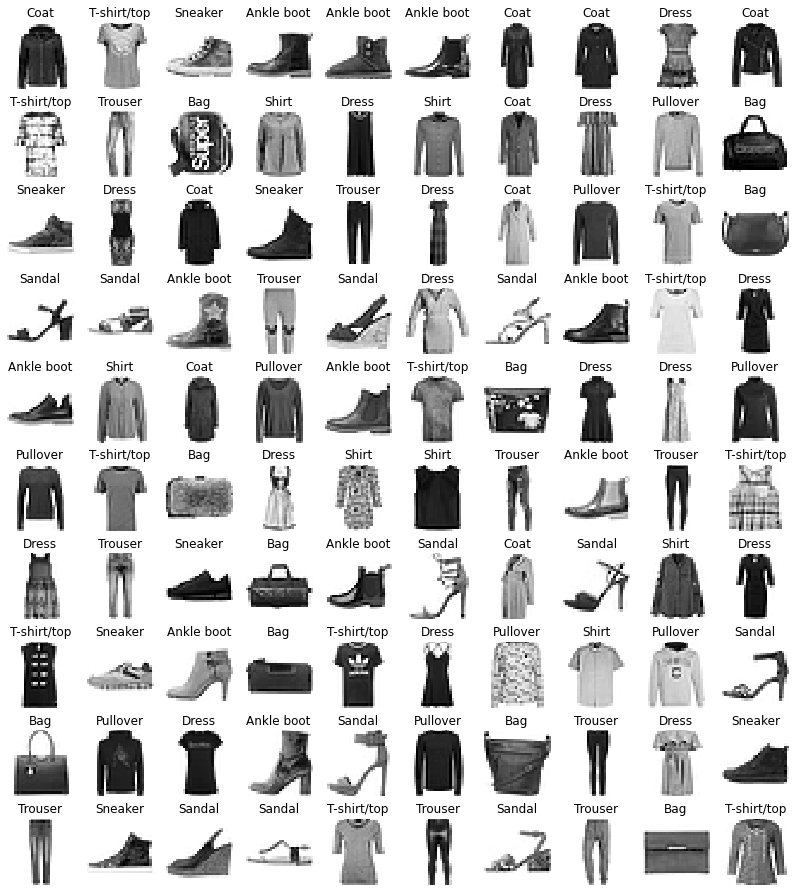

In [4]:
def show_images(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary", interpolation = "nearest")
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

show_images(10, 10, x_train, y_train, class_names)

In [5]:
# 归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [6]:
# tf.keras.Sequential.Model

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = "adam", metrics = ["accuracy"])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Tensorboard, earlystopping, ModelCheckpoint
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")

callbacks = [
        keras.callbacks.TensorBoard(logdir),
        keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
        keras.callbacks.EarlyStopping(patience=3, min_delta=1e-3)
]
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid),
                   callbacks = callbacks)
history.history

Epoch 1/10


InternalError:  Blas GEMM launch failed : a.shape=(32, 784), b.shape=(784, 300), m=32, n=300, k=784
	 [[node sequential/dense/MatMul (defined at <ipython-input-8-cad4fefd8eb3>:13) ]] [Op:__inference_train_function_664]

Function call stack:
train_function


In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [ ]:
test_loss, test_acc = model.evaluate(x_test_scaled,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)